## Assignment 2, part 2
### Neural Network Classifier of Fake News

In this assignment I will have to create a set of different scripts/notebooks that can classify unseen news-text into the categories fake or real. 

For this second part I will train a neural network classifier on the data. This could eventually be turned into a script, but since we haven't worked with scripts it remains as a notebook for now.

First we load the required packages:

In [6]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

We'll start by loading our data. To create an overview, we need to:
- Load the data
- Create arrays with text and labels (undependents and dependents)
- Split the dataset and extract information (transform data)
- Fit a classifier and use it to predict unseen data
- Evaluate the metrics and performance and save the output as a text-file
- Save the models and the vectorised data

Because of the redundancy the structure of the part 1 and 2 of this assignment is fairly similar. This could, again, be solved with a script, that pulls the same functions. 
Let's get our data loaded:

In [2]:
data = pd.read_csv(os.path.join("fake_or_real_news.csv"), index_col=0)

We have already worked with the data, so we know its structure. It has approx equal amount of fake and real news and each text is accompanied by a title. For now we'll use simply on the text data.

In [3]:
X = data["text"] #Industry-standard for training data
y = data["label"] #The dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,           # undependent
                                                    y,          # dependent
                                                    test_size=0.2,   # split
                                                    random_state=42) # random state, because Douglas Adams...

We cannot simply start fitting on text-data, we need it in a readable format. We use the TF-IDF to transform the words of the texts into a vectorised format - that is, we need numbers!!! We use the same attributes as Ross has suggested - one could suggest varying the number of features from 100.

Because this is part two, we'll just load the vectorizer we already have! 

In [4]:
from joblib import dump, load
inpath = os.path.join("..", "models")
vectorizer = load(os.path.join(inpath, "tfidf_vectorizer.joblib"))

X_train_feats = vectorizer.fit_transform(X_train) 
X_test_feats = vectorizer.transform(X_test) #no fit here, since we already have the features. No fit on training data!!!

Now we have a nice data-format to proceed. For this part of the assignment we use a neural network classifier. The model will have access to y as a solution sheet to train itself.

In [9]:
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter=1000,
                           random_state = 13) #New random state!

classifier = classifier.fit(X_train_feats, y_train)

Now it is time to test how well our model performs. We draw our test-set (without labels) and aim to predict the labels. The outcommented codes are important eyegazes at our model - one thing is the performance (which we'll get to shortly), but another thing is the interpretablibility. What are we actually predicting on?

In [11]:
y_pred = classifier.predict(X_test_feats)
print(X_test[:20],y_pred[:20])

9957     Will Trump pull a Brexit times ten? What would...
7596     Clintons Are Under Multiple FBI Investigations...
8905     Dispatches from Eric Zuesse This piece is cros...
8752     Print \n[Ed. – Every now and then the facade c...
7804     Nanny In Jail After Force Feeding Baby To Deat...
8690     By Belén Fernández | FAIR PHOTO ABOVE: Hillary...
5065     The words, when they came, had lost no power o...
5965     By Amanda Froelich It should be evident if you...
130      A white police officer in North Charleston, S....
7451     Tony Blair helpfully describes Remain voters a...
6142     0 comments GOP VP candidate Mike Pence’s Trump...
1026     Clinton lost her temper at an event on Thursda...
4469     House Speaker Paul D. Ryan attempted to lift t...
6874     The Washington Post \nExcerpts: Once prohibite...
5917     Project Veritas 4: Robert Creamer's Illegal $2...
10397    Miss Russia AFP/East News \nMiss Russia Alisa ...
4618     On September 5, 2006, Eli Chomsky was an edito.

Finally we want to evaluate. We can do this with the confusion matrix and a report.

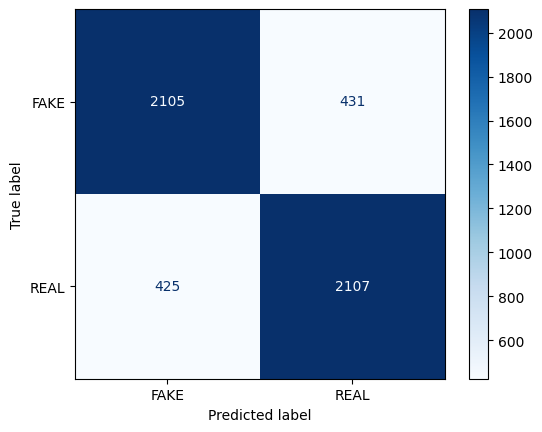

In [12]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # Classifier
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # layout
                                            labels=["FAKE", "REAL"])# the labels, arranged alphabetically

In [13]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.85      0.84       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



This looks reasonable, fairly high accuracy, but not a perfect classifier. Almost the same stats as our logistic regression. According to the assignment the first thing we need to do is to save this classification_report:

In [15]:
outpath = os.path.join("..", "out", "NN_classification_report.txt")
f= open(outpath,"w+") #https://www.guru99.com/reading-and-writing-files-in-python.html
f.write(classifier_metrics)
f.close()

Finally, we want to save the additional model to models

In [16]:
from joblib import dump, load
outpath = os.path.join("..", "models")
dump(classifier, os.path.join(outpath, "NN_classifier.joblib"))

['../models/NN_classifier.joblib']